# Load data

# Try two kernel

In [1]:
from IPython.display import SVG, display
from tqdm import tqdm
from pyclustertend import hopkins,ivat
from tqdm import tqdm


import hdbscan
import umap
import pickle
import os
import itertools
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
gene_expression = pd.read_csv(
    "/data/g0017139/Set1/CCLE__Affy_hgu133plus2_QCed_mRNA_NoDuplicates_CleanedIdentifiers_RMA-sketch_genelevel_using_jetscore.txt",
    sep=None, engine='python', header=0,
)
gene_expression = gene_expression.T

In [3]:
gene_expression.shape

(1067, 19635)

In [4]:
gene_expression

,1,2,9,10,12,13,14,15,16,18,...,10524,10938,11054,23061,54869,60674,79133,147660,245972,729348
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A01_436578.CEL,4.223429,3.674479,7.277365,4.145208,4.029598,3.433433,8.946383,3.249680,10.276116,8.101744,...,7.975829,7.666894,6.542198,7.748051,4.514262,12.642093,9.141612,3.779939,5.276707,14.115320
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A02_436580.CEL,4.384075,3.750469,6.997519,5.128134,3.978323,4.304716,8.948517,3.416038,9.622012,5.498473,...,7.875326,8.847765,7.690263,8.136758,6.141332,12.151447,8.009569,3.706794,5.516570,12.147721
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A03_436582.CEL,6.783196,3.767826,3.897323,4.133214,4.129925,3.647417,8.780586,3.735504,9.370273,3.738432,...,7.569357,7.408654,6.259688,6.868895,4.438964,11.698306,8.672440,3.814778,5.595085,12.287252
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A05_436586.CEL,4.476213,4.029830,9.350321,4.497987,4.521013,3.595288,9.101276,3.520743,9.955727,5.768418,...,7.662641,9.527644,7.908985,7.012102,4.701159,12.965402,9.406763,3.838322,6.038491,11.017916
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A06_436588.CEL,5.596887,3.794230,9.037694,4.560074,3.839451,3.591908,9.559303,3.654630,9.934966,5.939260,...,8.425545,9.359440,7.259569,7.445686,4.149302,11.995794,8.860146,3.816308,5.552706,10.789574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H07_474624.CEL,7.020229,3.604623,9.552231,3.967111,4.015805,3.493510,7.959359,3.871260,11.628972,7.348019,...,7.952288,9.907248,7.079067,7.715556,4.423841,13.222338,8.560196,3.939343,5.240587,9.847610
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H09_474734.CEL,5.981265,3.853859,8.240386,4.211769,3.921458,3.690866,9.061742,3.469436,10.899650,9.200349,...,8.204108,10.017769,8.387435,8.788594,6.402662,12.962934,7.989192,4.299388,5.433049,8.606686
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H10_474614.CEL,4.786461,5.602934,8.057336,4.185823,5.254947,3.398607,8.640023,3.380242,10.177668,8.707979,...,6.587001,7.625971,6.965988,7.898270,4.509069,12.372738,8.833618,3.677973,5.608546,10.422215
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H11_474690.CEL,5.318138,3.728012,8.798405,4.186391,4.366862,3.596459,9.206282,3.345551,11.897365,5.178586,...,7.983068,9.165479,6.779695,7.252939,4.499319,13.226825,9.336131,3.857535,5.755694,11.361798


In [5]:
Entrez_Map = pd.read_csv('/data/g0017139/Set1/Entrezid_mapping_using_org_Hs_eg_db_03052021.txt',
                               sep=None, engine='python', header=0,
)
Entrez_Map.sort_values(['CHR_Mapping', 'BP_Mapping'], axis=0, inplace=True)
Entrez_Map

,mapped_entrez_v1,CHR_Mapping,BP_startloc,BP_endloc,sense_or_antisense,GENENAME,SYMBOL,BP_Mapping
1,653635,1,14361.00,29370.00,-1,"WASP family homolog 7, pseudogene",WASH7P,21865.50
11,79501,1,69090.00,70008.00,1,olfactory receptor family 4 subfamily F member 5,OR4F5,69549.00
128,100132287,1,490755.00,495445.00,-1,uncharacterized LOC100132287,LOC100132287,493100.00
150,729759,1,568227.00,569166.00,-1,olfactory receptor family 4 subfamily F member 29,OR4F29,568696.50
168,101928626,1,627379.00,629009.00,-1,uncharacterized LOC101928626,LOC101928626,628194.00
...,...,...,...,...,...,...,...,...
4446,474148,24,24832607.50,24837505.00,1,"testis-specific transcript, Y-linked 3B",TTTY3B,24835056.25
4447,253175,24,24833813.25,24836316.75,1,chromodomain Y-linked 1B,CDY1B,24835065.00
4448,9085,24,24833813.25,24836316.75,1,chromodomain Y-linked 1,CDY1,24835065.00
4449,114758,24,24833170.00,24836968.00,1,CSPG4 pseudogene 1 Y-linked,CSPG4P1Y,24835069.00


In [6]:
TumorType = pd.read_csv('/data/g0017139/Set1/CCLE__Sample_To_TumorType.csv',
                               sep=None, engine='python', header=0,
                       )

TumorType = TumorType.set_index('GSM_IDENTIFIER')
TumorType

,TYPE,Type2,TYPE3
GSM_IDENTIFIER,,,
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_G03_436510.CEL,Breast cancer,Breast cancer,Breast carcinoma
MAKER_p_NCLE_RNA7_HG.U133_Plus_2_C07_454622.CEL,Breast cancer,Breast cancer,Breast carcinoma
BUNDS_p_NCLE_RNA5_HG.U133_Plus_2_B03_419876.CEL,Breast cancer,Breast cancer,Breast carcinoma
CASED_p_NCLE_RNA4_HG.U133_Plus_2_C01_383628.CEL,Breast cancer,Breast cancer,Breast carcinoma
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_A08_474686.CEL,Breast cancer,Breast cancer,Breast carcinoma
...,...,...,...
CRAZY_p_NCLE_RNA10_HG.U133_Plus_2_B08_569552.CEL,Urogenital,Urogenital,Ovarian carcinoma
BRAKE_p_NCLE_RNA2_HG.U133_Plus_2_E11_241158.CEL,Urogenital,Urogenital,Endometrial cancer
BUNDS_p_NCLE_RNA5_HG.U133_Plus_2_F03_419766.CEL,Urogenital,Urogenital,Endometrial cancer


# Explore data

In [7]:
scaler = StandardScaler()
normalized = scaler.fit_transform(gene_expression)
pd.DataFrame(normalized, columns=gene_expression.columns, index=gene_expression.index).to_csv("Results/gene_expression_norm.dat", sep = " ",header=False, index=False)

In [8]:
#hopkins(gene_expression.values, 1067)

In [9]:
#ivat(normalized)

# PCA

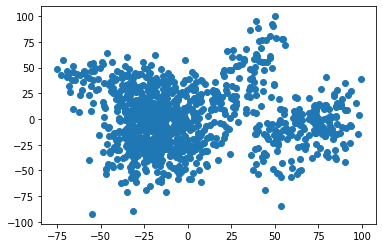

In [10]:
pca = PCA(n_components=None, svd_solver='full')
pca_components = pca.fit_transform(normalized)
plt.scatter(pca_components[:,0], pca_components[:,1])
plt.show()

# UMAP

In [11]:
result = pd.concat([gene_expression, TumorType], axis=1)
colorset = {}
for i, x in enumerate(set(result['TYPE'])):
    colorset[x] = plt.get_cmap('tab20')(i)
    
colors = [colorset[x] for x in result['TYPE']]

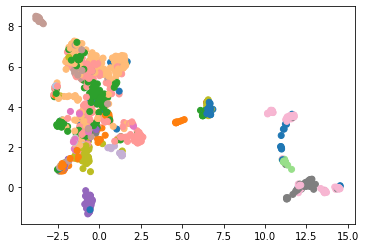

In [12]:
um = umap.UMAP(random_state=42)
umap_components = um.fit_transform(normalized)
plt.scatter(umap_components[:,0], umap_components[:,1], c=colors)
plt.show()

# Gridsearch

In [17]:
def get_score(X, labels):
    result = {}
    try:
        result['silhouette_score'] =  silhouette_score(X, labels, metric='euclidean')
    except:
        result['silhouette_score'] = np.nan
    
    try:
        result['calinski_harabasz_score'] =  calinski_harabasz_score(X, labels)
    except:
        result['calinski_harabasz_score'] = np.nan
    
    try:
        result['davies_bouldin_score'] =  davies_bouldin_score(X, labels)
    except:
        result['davies_bouldin_score'] = np.nan
    return result
           
    

def product_dict(**kwargs):
    keys = kwargs.keys()
    vals = kwargs.values()
    for instance in itertools.product(*vals):
        yield dict(zip(keys, instance))
        
    
def fit(alg, X,  parameter, clustering):
    if isinstance(alg, Pipeline): 
        alg.set_params(**parameter)
    else:
        for name in parameter:
            if isinstance(parameter[name], np.generic):
                setattr(alg, name, parameter[name].item())
            else:
                setattr(alg, name, parameter[name])
    start_time = time.time()
    alg.fit(X)
    fit_time =  time.time() - start_time
    # Get scores and make dataframe
    try:
        if isinstance(alg, Pipeline):
            yp = alg['Clustering'].labels_
        else:
            yp = alg.labels_
    except (AttributeError, TypeError):
        yp = alg.predict(X)
        if clustering == 'Soft':
            yp = [np.argmax(q) for  q in yp]
    current_scores = get_score(X, yp)
    current_scores['Fit_Time'] = fit_time
    current_scores.update(parameter)
    return current_scores

def gridsearch(alg, X,  parameters, clustering='Hard'):
    scores =[]
    for parameter in tqdm(product_dict(**parameters), total=len(list(product_dict(**parameters)))):
        # Fit alg
        current_scores = fit(alg, X,  parameter, clustering)
        scores.append(current_scores)  
    return scores

results_grid = {}

# K-means

In [18]:
parameters = {'n_clusters': np.arange(2,30),
              'batch_size': [128, 256, 512, 1024]}
kmeans = MiniBatchKMeans(random_state=0)
results_grid['kMeans'] = pd.DataFrame(gridsearch(kmeans, normalized, parameters))

100%|██████████| 112/112 [09:49<00:00,  5.27s/it]


In [19]:
results_grid['kMeans'].sort_values('silhouette_score', axis=0, ascending=False).head(4)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score,Fit_Time,n_clusters,batch_size
2,0.104322,66.925385,3.049233,3.727473,2,512
3,0.104322,66.925385,3.049233,6.926101,2,1024
1,0.104322,66.925385,3.049233,2.491794,2,256
0,0.102786,67.610557,3.551061,1.184271,2,128


In [20]:
results_grid['kMeans'].sort_values('calinski_harabasz_score', axis=0, ascending=False).head(4)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score,Fit_Time,n_clusters,batch_size
0,0.102786,67.610557,3.551061,1.184271,2,128
1,0.104322,66.925385,3.049233,2.491794,2,256
2,0.104322,66.925385,3.049233,3.727473,2,512
3,0.104322,66.925385,3.049233,6.926101,2,1024


In [21]:
results_grid['kMeans'].sort_values('davies_bouldin_score', axis=0, ascending=True).head(4)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score,Fit_Time,n_clusters,batch_size
108,0.025132,13.280505,2.782406,2.625650,29,128
24,0.014156,27.547398,2.844376,1.234352,8,128
84,-0.015535,14.354837,2.888636,2.007649,23,128
92,0.013423,14.681346,2.952778,2.148683,25,128


In [22]:
with open('Results/GridsearchPython.pkl', 'wb') as f:
        pickle.dump(results_grid, f, pickle.HIGHEST_PROTOCOL)

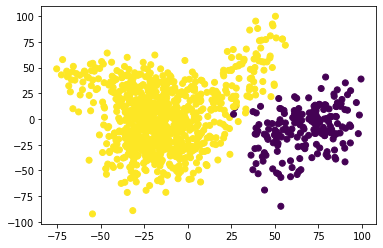

In [23]:
kmeans = MiniBatchKMeans(n_clusters=2,
                         random_state=0,
                         batch_size=256)
kmeans.fit(normalized)

plt.scatter(pca_components[:,0], pca_components[:,1], c=kmeans.labels_)
plt.show()

# HDDA

In [ ]:
# Rscript HddR.r

c = pd.read_csv('Results/HDDC.csv').set_index('Unnamed: 0')
plt.scatter(pca_components[:,0], pca_components[:,1], c=c.values.ravel())
plt.show()

# UMAP + DBSCAN

In [32]:
parameters = {'DimReduction__n_neighbors': np.arange(30,100,20),
              'DimReduction__min_dist': np.linspace(0,1,3),
              'DimReduction__n_components': np.arange(1,100,25)[::-1],
              'Clustering__min_cluster_size': [2 ,25 ,50 ,75 ,100],
              'Clustering__min_samples': [2 ,25 ,50 ,75 ,100],
              'Clustering__cluster_selection_epsilon': [0.1, 0.5, 1],
              'Clustering__cluster_selection_method': ['eom', 'leaf']
}


pipe = Pipeline([('DimReduction', 
                  umap.UMAP(
                      n_neighbors=30,
                      min_dist=0.0,
                      n_components=2,
                      random_state=42)),
                 ('Clustering', 
                 hdbscan.HDBSCAN())
                ])
results_grid['Uhdbscan'] = pd.DataFrame(gridsearch(pipe, normalized, parameters))

  1%|          | 56/7200 [18:38<39:37:43, 19.97s/it]


KeyboardInterrupt: 

In [25]:
results_grid['Uhdbscan']

,silhouette_score,calinski_harabasz_score,davies_bouldin_score,Fit_Time,DimReduction__n_neighbors,DimReduction__min_dist,DimReduction__n_components,Clustering__min_cluster_size,Clustering__min_samples,Clustering__cluster_selection_epsilon,Clustering__cluster_selection_method
0,0.022814,17.421819,4.110558,10.964057,30,0.0,1,25,25,0.1,leaf
1,0.023724,35.044462,3.189767,10.174382,30,0.0,1,25,25,1.0,leaf
2,-0.007032,19.225849,4.423300,10.662118,30,0.0,1,25,50,0.1,leaf
3,0.051800,26.070956,3.657167,10.855548,30,0.0,1,25,50,1.0,leaf
4,0.023323,23.924977,4.438511,10.208740,30,0.0,1,50,25,0.1,leaf
...,...,...,...,...,...,...,...,...,...,...,...
59,-0.029911,24.114301,4.937411,19.730410,80,1.0,51,25,50,1.0,leaf
60,0.018274,31.856687,4.533738,19.601205,80,1.0,51,50,25,0.1,leaf
61,0.018274,31.856687,4.533738,19.897928,80,1.0,51,50,25,1.0,leaf
62,-0.029911,24.114301,4.937411,19.687152,80,1.0,51,50,50,0.1,leaf


# Enhanced soft subspace clustering

In [33]:
from TSKFS.fuzzy_cluster import ESSC
parameters = {'n_cluster': np.arange(2,20, 1),
              'eta': [0, 0.1, 0.2, 0.3, 0.5, 0.7 , 0.9],
              'gamma': [1, 2, 5, 10, 50, 100, 1000]
             } 
essc = ESSC(None)
results_grid['essc'] = pd.DataFrame(gridsearch(essc, normalized, parameters, "Soft"))

  1%|          | 8/882 [05:04<9:14:17, 38.05s/it]


KeyboardInterrupt: 

In [79]:
results_grid['essc'].sort_values('silhouette_score', axis=0, ascending=False).head(4)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score,Fit_Time,n_cluster,eta,gamma
1,-0.10904,1.187343,0.95217,216.328453,12,0,1
0,NaN,NaN,NaN,16.607626,2,0,1


In [76]:
results_grid['essc'].sort_values('calinski_harabasz_score', axis=0, ascending=False).head(4)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score,Fit_Time,n_cluster,eta,gamma
0,NaN,NaN,NaN,87.633526,2,0.5,10
1,NaN,NaN,NaN,210.287090,2,0.9,10
2,NaN,NaN,NaN,1118.063232,12,0.5,10
3,NaN,NaN,NaN,1114.526803,12,0.9,10


In [77]:
results_grid['essc'].sort_values('davies_bouldin_score', axis=0, ascending=True).head(4)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score,Fit_Time,n_cluster,eta,gamma
0,NaN,NaN,NaN,87.633526,2,0.5,10
1,NaN,NaN,NaN,210.287090,2,0.9,10
2,NaN,NaN,NaN,1118.063232,12,0.5,10
3,NaN,NaN,NaN,1114.526803,12,0.9,10


In [ ]:
with open('Results/GridsearchPython.pkl', 'wb') as f:
        pickle.dump(results_grid, f, pickle.HIGHEST_PROTOCOL)

# Mafia

In [ ]:
# Run on high memory cluster

# Elastic Net Subspace Clustering

In [ ]:
from subspaceClustering.cluster.selfrepresentation import ElasticNetSubspaceClustering
ensc = ElasticNetSubspaceClustering(n_clusters=5)
parameters = {'n_clusters': [np.arange(2, 20, 1)],
              'affinity ': ['symmetrize', 'nearest_neighbors'],
              'tau': np.linspace(0, 1, 5),   
              'gamma': [1, 2, 5, 10, 50, 100, 1000]
             }

ensc = ElasticNetSubspaceClustering(algorithm ='spams', n_jobs=-1)
results_grid['ensc'] = pd.DataFrame(gridsearch(ensc, normalized, parameters))

  0%|          | 0/70 [00:00<?, ?it/s]/home/g0017139/UMCG_Thesis/Working_Code/subspaceClustering/cluster/selfrepresentation.py:279: RuntimeWarning: divide by zero encountered in double_scalars
  alpha0 = np.amax(coh) / tau  # value for which the solution is zero
/home/g0017139/UMCG_Thesis/Working_Code/subspaceClustering/cluster/selfrepresentation.py:155: RuntimeWarning: invalid value encountered in double_scalars
  lambda1=tau*alpha, lambda2=(1.0-tau)*alpha)
/home/g0017139/UMCG_Thesis/Working_Code/subspaceClustering/cluster/selfrepresentation.py:162: RuntimeWarning: invalid value encountered in double_scalars
  obj = tau * np.sum(np.abs(cs[0])) + (1.0 - tau)/2.0 * np.sum(np.power(cs[0], 2.0)) + alpha/2.0 * np.sum(np.power(delta, 2.0))


In [25]:
import pickle
with open('Results/GridsearchPython.pkl', 'wb') as f:
        pickle.dump(results_grid, f, pickle.HIGHEST_PROTOCOL)